In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from matplotlib import animation
from JSAnimation.IPython_display import display_animation
np.set_printoptions(3)

In [23]:
# Initial state in shock tube
u = np.zeros((3,nx), dtype=float)

# left side parameters
lhs = np.where(x<=0.)
u[0,lhs] = 1
u[1,lhs] = 0
u[2,lhs] = 10**5

# right side parameters
rhs = np.where(x>=0.)
u[0,rhs] = 0.125
u[1,rhs] = 0
u[2,rhs] = 10**4

In [25]:
def flux_vect(u, gamma):
    """ Compute flux vector"""
    f = np.zeros((3,len(u[0,:])), dtype=float)
    
    f[0,:] = u[1,:]
    f[1,:] = u[1,:]**2/u[0,:] + (gamma-1)*(u[2,:] - 0.5*\
                (u[1,:]**2/u[0,:]))
    f[2,:] = (u[2,:] + (gamma-1)*(u[2,:] - 0.5*(u[1,:]**2/u[0,:])))*\
            (u[1,:]/u[0,:])
        
    return f

In [28]:
def Richtmyer(u, nt, dt, dx, gamma):
    """Computes the solution with Richtmyer scheme"""
    
    u_star = np.zeros_like(u)
    u_n = np.zeros_like(u)
    u_star = u.copy()     # predictor
    u_n = u.copy()        # corrector
    
    # temporary arrays
    #u_plus = np.zeros_like(u)
    #u_minus = np.zeros_like(u)
    #f = np.zeros_like(u)
    
    for t in range(1,nt):
        #u_plus[:,:-1] = u[:,1:] # compensating for i+1/2
        #u_minus = u.copy        # compensating for i+1/2 
        f = flux_vect(u, gamma)
        u_star[:,:-1] = 0.5*(u[:,1:]+u[:,:-1]) - \
                dt/(2*dx)*(f[:,1:]-f[:,:-1])
        f_star = flux_vect(u_star, gamma)
        u_n[:,1:] = u_n[:,1:] - dt/dx(f[:,1:]-f[:,:-1])
    
    return u_n

In [22]:
# Initial Parameters

L = 20     # length of shocktube

nx = 101   # number of grid points 
dx = L/(nx-2.)    # grid spacing

x = np.linspace(-10., 10., nx)

gamma = 1.4  # specific heat ratio of air

In [29]:
sigma = 1.0
dt = sigma*dx/350
nt = int(dt/0.01)

u_n = Richtmyer(u, nt, dt, dx, gamma)

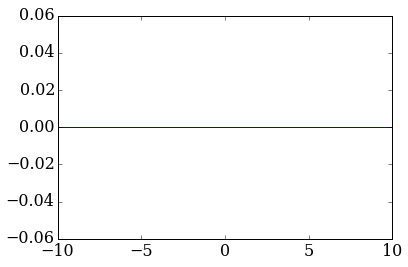

In [30]:
plt.plot(x,u_n[1,:]/u[0,:])